In [2]:
!pip install scikit-multilearn

In [3]:
from tkinter import *
from tkinter.messagebox import *
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import Pipeline

In [4]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')


In [5]:
abstract_list_train = []
abstract_list_test = []
stemmer = PorterStemmer()
stop_words = stopwords.words('english')

In [6]:
#Remove StopWords and Stemming
def remove_stopwords(data = []):
    data_list = []
    for name in data:
        words = word_tokenize(name)
        stem_word = ""
        for a in words:
            if a.lower() not in stop_words:
                stem_word += stemmer.stem(a) + ' '
        data_list.append(stem_word.lower())
    return data_list

In [7]:
#Remove Special Characters
def remove_special_character(data = []):
    abstract_list_wo_sc = []
    special_characters = '''!()-—[]{};:'"\, <>./?@#$%^&*_~0123456789+=’‘'''
    for file in data:
        word_wo_sc = ""
        if len(file.split()) == 1:
            abstract_list_wo_sc.append(file)
        else:
            for a in file:
                if a in special_characters:
                    word_wo_sc += ' '
                else:
                    word_wo_sc += a
            abstract_list_wo_sc.append(word_wo_sc)
    return abstract_list_wo_sc


In [8]:
#Remove stopwords from Train Data
data_train = np.array(train_data['ABSTRACT'])
abstract_list_train = remove_stopwords(data_train)


In [9]:
#Remove stopwords from Test Data
data_test = np.array(test_data['ABSTRACT'])
abstract_list_test = remove_stopwords(data_test)


In [10]:
#Removing speaial characters from Train Data and Test Data
abstract_list_wo_sc_train = remove_special_character(abstract_list_train)
abstract_list_wo_sc_test = remove_special_character(abstract_list_test)


In [11]:

categories=['Computer Science', 'Physics', 'Mathematics', 'Statistics']

In [12]:
x_train = abstract_list_wo_sc_train
y_train = train_data[categories]
x_test = abstract_list_wo_sc_test
y_test = test_data[categories]

In [13]:
print("There are ", len(x_train), " input training samples")
print("There are ", len(x_test), " input testing samples")
print("There are ", y_train.shape, " output training samples")
print("There are ", y_test.shape, " output testing samples")


There are  14004  input training samples
There are  6002  input testing samples
There are  (14004, 4)  output training samples
There are  (6002, 4)  output testing samples


In [14]:
# defining parameters for pipeline
parameters = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),('clf', ClassifierChain(MultinomialNB())),])


In [15]:
# train data
parameters.fit(x_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('clf',
                 ClassifierChain(classifier=MultinomialNB(),
                                 require_dense=[True, True]))])

In [16]:
# predict
predictions = parameters.predict(x_test)


In [17]:

print('Accuracy = ', accuracy_score(y_test,predictions))
print('F1 score is ',f1_score(y_test, predictions, average="micro"))
print(classification_report(y_test,predictions))

Accuracy =  0.6391202932355882
F1 score is  0.7653077537969625
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      2529
           1       0.99      0.87      0.92      1644
           2       0.99      0.48      0.65      1194
           3       0.92      0.34      0.49      1660

   micro avg       0.87      0.68      0.77      7027
   macro avg       0.92      0.64      0.72      7027
weighted avg       0.90      0.68      0.74      7027
 samples avg       0.76      0.72      0.73      7027



/Users/krish/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


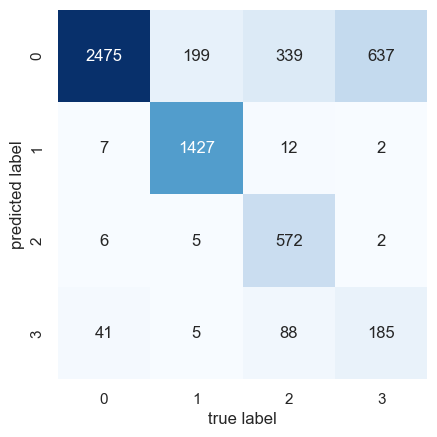

In [18]:
#Confusion Matrix and HeatMap Generation
mat = confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [19]:
with open('model_MultiNB.pkl', 'wb') as picklefile:
    pickle.dump(parameters.named_steps['clf'], picklefile)